# Installing + Importing Packages and Setup

In [488]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [489]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
apache-beam                   2.41.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
avro-python3                  1.10.2
Babel                         2.9.1
backcall                      0.2.0
bac

In [490]:
import tensorflow as tf
import os

In [491]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [492]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Removing Potentially Corrupt Images (may alter predictions/accuracy if left in data) + Function Testing

In [493]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [494]:
data_dir = 'D:\data'

In [495]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [496]:
# displaying every image class we are working with (2 classes)
for image_class in os.listdir(data_dir):
    print(image_class)

cats
dogs


In [497]:
# Printing every image from each class
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

07CAT-STRIPES-mediumSquareAt3X-v2.jpg
0pexels-photo-1870376.jpeg.jpg
1200px-Cat03.jpg
1200x0.jpg
12mag-LOR-1-superJumbo.jpg
14-Fun-Facts-about-CatsTEASER.jpg
190718181632-cats-movie-trailer.jpg
1E3A3E62-B3CA-434A-8C3B3ED0C982FB69_source.jpg
220726-cat-theo-elise-ew-636p-6cd3b0.jpg
220805-domestic-cat-mjf-1540-382ba2.jpg
32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg
370_1147_f1.jpeg
5d03c812-263a-43b7-a406-d82856a83281-cat8.jpg
6272fdedbadd0.image.jpg
719946ca-660e-4ebf-805a-2c3b7d221a85-Hero-3.jpg
84c-Cat17.jpg
AOh-ky1-_X8azw322QCS049T-hRIeJrdWk4xcYnFi6ues64-c-mo.jpg
Brody-CatsReview.jpg
cat-1.jpg
cat-10-e1573844975155-scaled.jpg
cat-217679.jpg
cat-behavior-issues.jpg
Cat-feature.jpg
cat.jpg
CatBeingStroked.jpg
CatsCaffeine-1024x576.png
Cat_poster_1.jpg
COMM-CATS-MOBILE-BANNER-640x520-c-default.jpg
df91f4de-332e-4961-afb7-415ac019f18b.jpg
DZPHYJ55JBHLVERW2UXVFS3XGQ.jpg
EBT-L-CATSHOW-0403-11.jpg
egypt_kitty_social.jpg
feral-cats-2048x1365.jpg
file-20170505-1693-ymh4bc.jpg
gettyimages-1

In [498]:
# displaying cat image 1 in numpy array
img = cv2.imread(os.path.join('D:\data','cats','cat-1.jpg'))

In [499]:
type(img)

numpy.ndarray

In [500]:
# viewing size dimensions of cat image
img.shape

(853, 1280, 3)

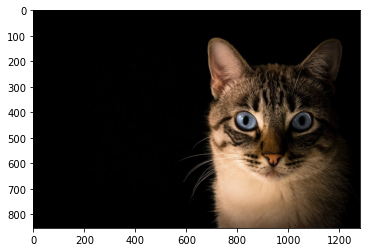

In [501]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [502]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading Data

In [503]:
import numpy as np
from matplotlib import pyplot as plt

In [504]:
data = tf.keras.utils.image_dataset_from_directory('D:\data')

Found 1279 files belonging to 2 classes.


In [505]:
data_iterator = data.as_numpy_iterator()

In [506]:
# Gets another batch from iterator
batch = data_iterator.next()

In [507]:
# numpy array image
batch[0].shape

(32, 256, 256, 3)

In [508]:
batch[1]

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

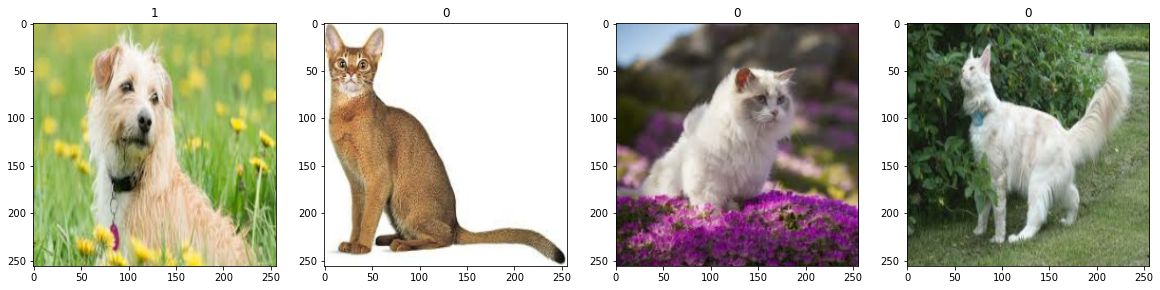

In [509]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [510]:
scaled = batch[0] / 255

In [511]:
scaled.min()

0.0

In [512]:
scaled.max()

1.0

# Data Preprocessing

### Scaling Data

In [513]:
data = data.map(lambda x,y: (x/255, y))

In [514]:
scaled_iterator = data.as_numpy_iterator()

In [515]:
batch = scaled_iterator.next()

In [516]:
data.as_numpy_iterator().next()

(array([[[[1.33609071e-01, 1.83823533e-04, 0.00000000e+00],
          [1.81632966e-01, 3.24754901e-02, 0.00000000e+00],
          [2.52588838e-01, 9.53814313e-02, 1.14889706e-04],
          ...,
          [8.73705566e-01, 8.93543184e-01, 8.65977347e-01],
          [8.74509811e-01, 8.94117653e-01, 8.66666675e-01],
          [8.70611191e-01, 8.90219033e-01, 8.62768054e-01]],
 
         [[1.36091381e-01, 1.83823533e-04, 0.00000000e+00],
          [1.81632966e-01, 3.24754901e-02, 0.00000000e+00],
          [2.52588838e-01, 9.53814313e-02, 1.14889706e-04],
          ...,
          [8.68931174e-01, 8.88768792e-01, 8.61202955e-01],
          [8.69515955e-01, 8.89123797e-01, 8.61672819e-01],
          [8.68099689e-01, 8.87707531e-01, 8.60256553e-01]],
 
         [[1.37516722e-01, 1.92889042e-04, 0.00000000e+00],
          [1.83180153e-01, 3.40226702e-02, 0.00000000e+00],
          [2.54136026e-01, 9.69286188e-02, 1.60217285e-04],
          ...,
          [8.67799640e-01, 8.87637258e-01, 8.6007

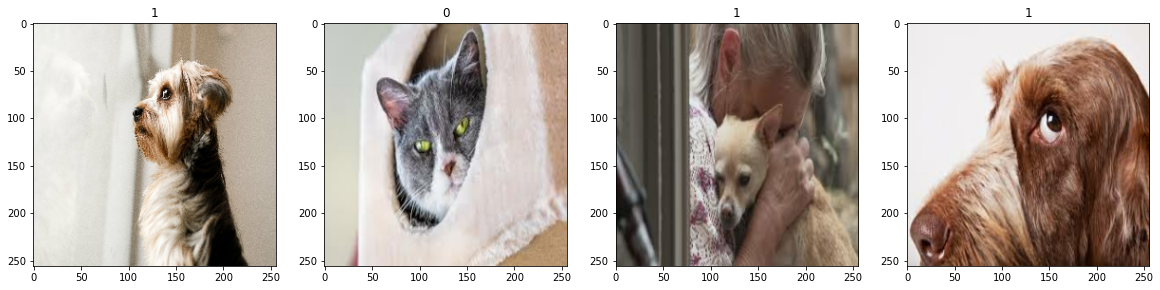

In [517]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
# DOG - Labeled '1', CAT - Labeled '0'

### Splitting the Data into Train, Valid, Test

In [518]:
len(data)

40

In [519]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [520]:
train_size+val_size+test_size

40

In [521]:
train_size

32

In [522]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model!

In [523]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [524]:
model = Sequential()

In [525]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [526]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [527]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 30, 30, 16)     

# Let's Begin Training!

In [528]:
logdir='D:\logs'

In [529]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [530]:
hist = model.fit(train, epochs=12, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/12
32/32 [==============================] - 6s 168ms/step - loss: 0.7544 - accuracy: 0.5352 - val_loss: 0.6831 - val_accuracy: 0.5547
Epoch 2/12
32/32 [==============================] - 6s 165ms/step - loss: 0.6557 - accuracy: 0.6152 - val_loss: 0.6489 - val_accuracy: 0.6172
Epoch 3/12
32/32 [==============================] - 5s 153ms/step - loss: 0.6018 - accuracy: 0.6660 - val_loss: 0.5464 - val_accuracy: 0.7109
Epoch 4/12
32/32 [==============================] - 5s 152ms/step - loss: 0.5056 - accuracy: 0.7559 - val_loss: 0.4808 - val_accuracy: 0.8125
Epoch 5/12
32/32 [==============================] - 5s 153ms/step - loss: 0.4023 - accuracy: 0.8301 - val_loss: 0.4151 - val_accuracy: 0.8359
Epoch 6/12
32/32 [==============================] - 5s 148ms/step - loss: 0.2772 - accuracy: 0.8916 - val_loss: 0.3043 - val_accuracy: 0.8750
Epoch 7/12
32/32 [==============================] - 5s 150ms/step - loss: 0.1889 - accuracy: 0.9307 - val_loss: 0.3267 - val_accuracy: 0.8906
Epoch 

# Let's View Loss and Accuracy After Training

In [531]:
hist.history

{'loss': [0.7543969750404358,
  0.65572190284729,
  0.6018025279045105,
  0.5056278705596924,
  0.4023005962371826,
  0.2771696150302887,
  0.18892024457454681,
  0.1991562396287918,
  0.1301434189081192,
  0.06392016261816025,
  0.06340725719928741,
  0.040774907916784286],
 'accuracy': [0.53515625,
  0.615234375,
  0.666015625,
  0.755859375,
  0.830078125,
  0.8916015625,
  0.9306640625,
  0.9345703125,
  0.9599609375,
  0.9833984375,
  0.98046875,
  0.990234375],
 'val_loss': [0.6831322312355042,
  0.6488709449768066,
  0.546381413936615,
  0.48082423210144043,
  0.41509729623794556,
  0.3043037950992584,
  0.32673001289367676,
  0.407217800617218,
  0.22367611527442932,
  0.30139991641044617,
  0.20767486095428467,
  0.15460476279258728],
 'val_accuracy': [0.5546875,
  0.6171875,
  0.7109375,
  0.8125,
  0.8359375,
  0.875,
  0.890625,
  0.8984375,
  0.921875,
  0.921875,
  0.96875,
  0.9453125]}

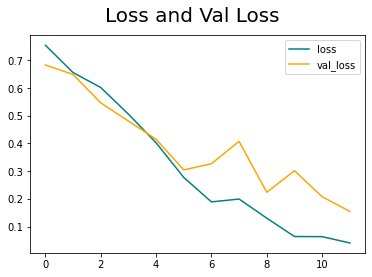

In [534]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss and Val Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()
# interesting findings

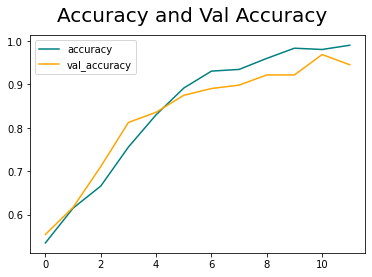

In [535]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy and Val Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
# interesting findings

# Evaluating Performance

### Evaluate/Validation

In [537]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [538]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [539]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 262ms/step


In [540]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9661017, shape=(), dtype=float32) tf.Tensor(0.9661017, shape=(), dtype=float32) tf.Tensor(0.96850395, shape=(), dtype=float32)


### Test

In [610]:
import cv2

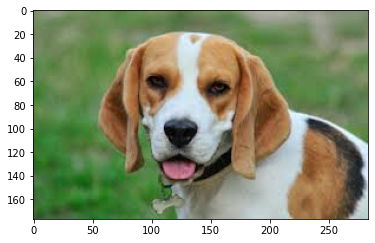

In [611]:
img = cv2.imread('D:\data\dogtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

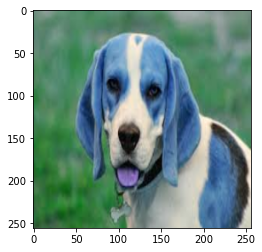

In [612]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [613]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [614]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [615]:
yhat

array([[0.9796651]], dtype=float32)

In [616]:
if yhat > 0.5:
    print(f'Predicted class is a DOG')
else:
     print(f'Predicted class is a CAT')

Predicted class is a DOG


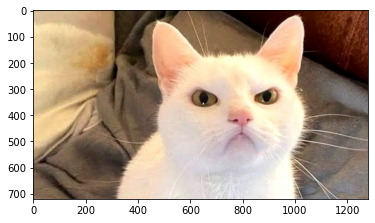

In [617]:
img = cv2.imread('D:\data\cattest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

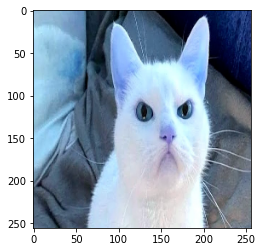

In [618]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [619]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [620]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 17ms/step


In [621]:
yhat

array([[0.01189039]], dtype=float32)

In [622]:
if yhat > 0.5:
    print(f'Predicted class is a DOG')
else:
     print(f'Predicted class is a CAT')

Predicted class is a CAT


# Saving Our Model

In [630]:
from tensorflow.keras.models import load_model

In [631]:
model.save(os.path.join('D:\models','dogsvscatsimageclassification.h5'))

In [632]:
new_model = load_model(os.path.join('D:\models','dogsvscatsimageclassification.h5'))

In [633]:
new_model